# Load Preprocessed Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../cleaned-data-kbk.csv', index_col=0)
df.head()

,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid 19 landa dunia indonesia 2020 da...
2,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


# Split Data

In [2]:
from sklearn.model_selection import train_test_split

X = df['judul_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 2337)

In [4]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

            term       rank
74          ajar  73.759380
1902       siswa  34.424785
1923         smk  33.334811
1010     kembang  32.497060
1005       kelas  31.645838
...          ...        ...
737   generation   0.220052
560       doubly   0.220052
1055   komoditas   0.200231
157        arima   0.200231
1813      sarima   0.200231

[2337 rows x 2 columns]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



# Oversampling: SMOTE

In [5]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [6]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Game Technology and Machine Learning Applications                                194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Strategi Pembelajaran Teknologi dan Kejuruan                                     194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control and Robotics)    194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Intelligent Power and Advanced energy System (IPAES)                             194
Ketenegakerjaan Teknologi dan Kejuruan                           

# Training Model

## GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.861 total time=   0.0s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.853 total time=   0.0s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.891 total time=   0.0s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.934 total time=   0.0s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.925 total time=   0.0s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.944 total time=   0.0s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.930 total time=   0.0s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.954 total time=   0.0s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.949 total time=   0.0s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.940 total time=   0.0s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.856 total time=   0.1s
[CV 2/10] END .....criterion=gini, max_depth=2

[CV 2/10] END .criterion=log_loss, max_depth=30;, score=0.838 total time=   0.1s
[CV 3/10] END .criterion=log_loss, max_depth=30;, score=0.837 total time=   0.1s
[CV 4/10] END .criterion=log_loss, max_depth=30;, score=0.930 total time=   0.1s
[CV 5/10] END .criterion=log_loss, max_depth=30;, score=0.931 total time=   0.1s
[CV 6/10] END .criterion=log_loss, max_depth=30;, score=0.935 total time=   0.1s
[CV 7/10] END .criterion=log_loss, max_depth=30;, score=0.942 total time=   0.1s
[CV 8/10] END .criterion=log_loss, max_depth=30;, score=0.948 total time=   0.1s
[CV 9/10] END .criterion=log_loss, max_depth=30;, score=0.955 total time=   0.1s
[CV 10/10] END criterion=log_loss, max_depth=30;, score=0.938 total time=   0.1s
[CV 1/10] END criterion=log_loss, max_depth=None;, score=0.810 total time=   0.1s
[CV 2/10] END criterion=log_loss, max_depth=None;, score=0.845 total time=   0.1s
[CV 3/10] END criterion=log_loss, max_depth=None;, score=0.845 total time=   0.1s
[CV 4/10] END criterion=l

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='roc_auc_ovr', verbose=3)

In [8]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086473,0.006129,0.006301,0.001185,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.860897,0.852750,0.890600,0.933615,0.924560,0.943766,0.929683,0.953616,0.948633,0.940105,0.917822,0.034715,4
1,0.135764,0.011791,0.006699,0.001410,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.855829,0.857100,0.876270,0.920724,0.939605,0.951564,0.952057,0.957330,0.956221,0.930226,0.919693,0.038993,3
2,0.138637,0.015246,0.005696,0.001185,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.831894,0.856744,0.859526,0.925749,0.937240,0.949930,0.935870,0.960333,0.945159,0.944720,0.914717,0.044148,5
3,0.146395,0.013318,0.005401,0.000917,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.813386,0.831823,0.839224,0.905074,0.937618,0.950044,0.934920,0.945865,0.938216,0.946270,0.904244,0.051511,11
4,0.155300,0.011809,0.006498,0.001625,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.850654,0.913070,0.891493,0.930821,0.945828,0.932014,0.949672,0.949214,0.957500,0.937710,0.925798,0.031170,1
5,0.197716,0.015007,0.006500,0.002111,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.836636,0.840291,0.869446,0.914226,0.931456,0.940605,0.936723,0.950635,0.955526,0.925445,0.910099,0.042400,7
6,0.203389,0.018842,0.006056,0.001763,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.816045,0.840276,0.843790,0.916898,0.935224,0.941389,0.935136,0.943398,0.948183,0.935321,0.905566,0.048365,9
7,0.193985,0.009017,0.004998,0.000891,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.803250,0.844454,0.853934,0.907672,0.930846,0.935025,0.935222,0.943576,0.954620,0.937409,0.904601,0.049108,10
8,0.142703,0.003664,0.005200,0.000400,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.841745,0.908909,0.891417,0.933240,0.942607,0.932214,0.941235,0.959779,0.962785,0.932427,0.924636,0.034209,2
9,0.195155,0.013227,0.005896,0.001216,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.839084,0.851345,0.869638,0.920554,0.933583,0.938434,0.938580,0.952872,0.953422,0.932034,0.912955,0.040636,6


In [9]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",1,0.925798,0.031170
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",2,0.924636,0.034209
gini_20,"{'criterion': 'gini', 'max_depth': 20}",3,0.919693,0.038993
gini_10,"{'criterion': 'gini', 'max_depth': 10}",4,0.917822,0.034715
gini_30,"{'criterion': 'gini', 'max_depth': 30}",5,0.914717,0.044148
log_loss_20,"{'criterion': 'log_loss', 'max_depth': 20}",6,0.912955,0.040636
entropy_20,"{'criterion': 'entropy', 'max_depth': 20}",7,0.910099,0.042400
log_loss_30,"{'criterion': 'log_loss', 'max_depth': 30}",8,0.907002,0.050594
entropy_30,"{'criterion': 'entropy', 'max_depth': 30}",9,0.905566,0.048365


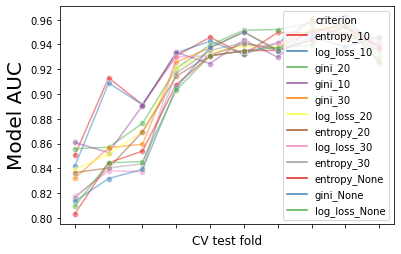

Correlation of models:
 criterion      entropy_10  log_loss_10   gini_20   gini_10   gini_30  \
criterion                                                              
entropy_10       1.000000     0.988478  0.874178  0.811289  0.906614   
log_loss_10      0.988478     1.000000  0.874434  0.833930  0.908851   
gini_20          0.874178     0.874434  1.000000  0.957342  0.971623   
gini_10          0.811289     0.833930  0.957342  1.000000  0.960398   
gini_30          0.906614     0.908851  0.971623  0.960398  1.000000   
log_loss_20      0.906930     0.912200  0.990603  0.972430  0.986247   
entropy_20       0.881452     0.889869  0.994162  0.974232  0.973963   
log_loss_30      0.914926     0.909197  0.971941  0.954306  0.985301   
entropy_30       0.918598     0.911398  0.979977  0.953865  0.993091   
entropy_None     0.945329     0.940540  0.969448  0.944850  0.982760   
gini_None        0.885761     0.872772  0.972190  0.946072  0.990647   
log_loss_None    0.942779     0.934347  

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=20)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [11]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

[Text(0.6417658730158731, 0.9545454545454546, 'X[74] <= 0.004\nentropy = 3.7\nsamples = 2522\nvalue = [194, 194, 194, 194, 194, 194, 194, 194, 194, 194\n194, 194, 194]'),
 Text(0.3911706349206349, 0.8636363636363636, 'X[226] <= 0.0\nentropy = 3.508\nsamples = 1852\nvalue = [194, 81, 182, 194, 194, 156, 71, 45, 189, 194, 9\n149, 194]'),
 Text(0.28174603174603174, 0.7727272727272727, 'X[828] <= 0.001\nentropy = 3.3\nsamples = 1248\nvalue = [15, 81, 169, 130, 166, 146, 71, 33, 181, 185, 8\n50, 13]'),
 Text(0.21746031746031746, 0.6818181818181818, 'X[1038] <= 0.0\nentropy = 3.071\nsamples = 1001\nvalue = [15, 60, 169, 127, 144, 8, 9, 33, 181, 185, 7, 50\n13]'),
 Text(0.1619047619047619, 0.5909090909090909, 'X[1923] <= 0.006\nentropy = 3.122\nsamples = 831\nvalue = [15, 60, 94, 127, 144, 8, 9, 33, 87, 185, 7, 49\n13]'),
 Text(0.10714285714285714, 0.5, 'X[2008] <= 0.003\nentropy = 2.965\nsamples = 767\nvalue = [15, 13, 94, 127, 144, 5, 5, 27, 87, 185, 3, 49\n13]'),
 Text(0.06825396825396825,

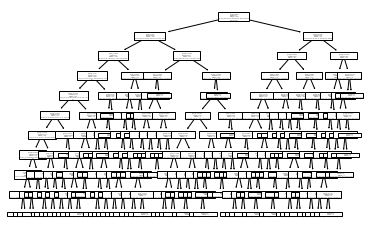

In [12]:
from sklearn import tree

tree.plot_tree(model) 

In [13]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  144


# Evaluation

In [14]:
predictions = model.predict(X_test_tfidf)

In [15]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 3  0  0  0  1  0  0  1  0  5  0  0  3]
 [ 0  4  0  0  0  2  2  6  0  0  1  0  0]
 [ 0  0  3  0  0  0  0  2  2 19  1  0  0]
 [ 2  0  0  5  4  1  0  0  0 12  0  0  0]
 [ 0  0  0  2  7  0  0  3  0 10  0  0  0]
 [ 0  6  0  3  0 10  5  2  0  3  2  0  0]
 [ 0  6  0  0  0  5  6  3  0  0  3  0  0]
 [ 0  0  0  0  1  0  0 71  1  2  8  4  1]
 [ 0  0  0  0  0  1  0  2 17 12  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  4  0  0  1]
 [ 0  4  0  0  0  0  5 26  1  0 26  0  0]
 [ 2  0  0  0  1  0  0  1  0  6  0 11  0]
 [ 5  0  0  0  1  0  0  0  0  3  0  1  4]]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


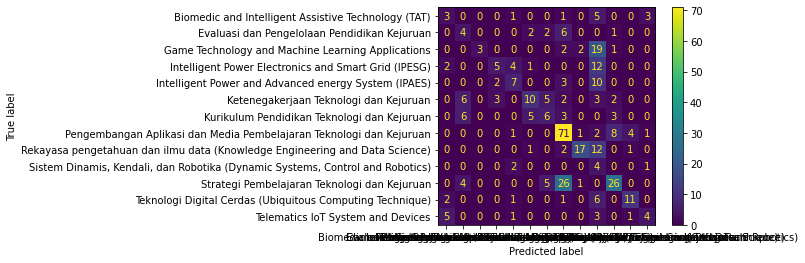

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.25      0.23      0.24        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.20      0.27      0.23        15
                            Game Technology and Machine Learning Applications       1.00      0.11      0.20        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.50      0.21      0.29        24
                         Intelligent Power and Advanced energy System (IPAES)       0.41      0.32      0.36        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.53      0.32      0.40        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.33      0.26      0.29        23
          Pengembangan Aplikasi dan Media Pembe

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.45
Precision score :  0.5734295434880551
Recall score :  0.45
F1 score :  0.46519353456433205


# Export Model

In [19]:
from joblib import dump

dump(model, filename="model/dtc-model.joblib")
dump(vectorizer, filename="model/vectorizer_model_judul.joblib")

['model/vectorizer_model_judul.joblib']

# Demo

In [20]:
title_input = input("Masukkan judul Skripsi:\n")

'''
Catatan input judul
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Judul Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan judul Skripsi:
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree
Judul Skripsi: klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree
                             Kelompok Bidang Keahlian  Probability
8   Rekayasa pengetahuan dan ilmu data (Knowledge ...     0.871429
2   Game Technology and Machine Learning Applications     0.128571
0   Biomedic and Intelligent Assistive Technology ...     0.000000
1        Evaluasi dan Pengelolaan Pendidikan Kejuruan     0.000000
3   Intelligent Power Electronics and Smart Grid (...     0.000000
4   Intelligent Power and Advanced energy System (...     0.000000
5              Ketenegakerjaan Teknologi dan Kejuruan     0.000000
6         Kurikulum Pendidikan Teknologi dan Kejuruan     0.000000
7   Pengembangan Aplikasi dan Media Pembelajaran T...     0.000000
9   Sistem Dinamis, Kendali, dan Robotika (Dynamic...     0.000000
10       Strategi Pembelajaran Teknologi dan Kejuruan     0.000000
11  Teknologi Dig